In [6]:
import sklearn
# Import all of the scikit learn stuff
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans, MiniBatchKMeans
import pandas as pd
import warnings
# Suppress warnings from pandas library
warnings.filterwarnings("ignore", category=DeprecationWarning,
module="pandas", lineno=570)


In [7]:
# -*- coding: utf-8 -*-
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import Text
from nltk import FreqDist
import os

## Data Preprocessing
def preprocessing(text):
    # 1.Tokenize into words
    tokens = [word for sent in nltk.sent_tokenize(text)
              for word in nltk.word_tokenize(sent)]

    # 2.Cleaning : Remove words less than three letters & Lower capitalization & Remove Numbers
    tokens = [word.lower() for word in tokens if len(word) >= 3  if not word.isdigit()]
    
    # 3.Remove stopwords
    stop = stopwords.words('english')
    stop.extend(["n't","'re","i'm","'ve",'...'])
    tokens = [token for token in tokens if token not in stop]
    
    # 4.Lemmatization
    lmtzr = WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(word) for word in tokens]
    tokens = [lmtzr.lemmatize(word, 'v') for word in tokens]

    return tokens


In [8]:
from __future__ import print_function


In [9]:
movie_content = []
movie_title = ["Alien","Titanic","Blade","GodFather","Total-Recall","War-Horse","Yes-Man"]

with open('/Users/simdaebeom/Documents/GitHub/nlp_t2m/input/Alien.txt', 'r') as content_file:
    content = content_file.read()
    content = preprocessing(content)
    content = " ".join(content)
movie_content.append(content)

with open('/Users/simdaebeom/Documents/GitHub/nlp_t2m/input/Titanic.txt', 'r') as content_file:
    content = content_file.read()
    content = preprocessing(content)
    content = " ".join(content)
movie_content.append(content)

with open('/Users/simdaebeom/Documents/GitHub/nlp_t2m/input/Blade.txt', 'r') as content_file:
    content = content_file.read()
    content = preprocessing(content)
    content = " ".join(content)
movie_content.append(content)

with open('/Users/simdaebeom/Documents/GitHub/nlp_t2m/input/GodFather.txt', 'r') as content_file:
    content = content_file.read()
    content = preprocessing(content)
    content = " ".join(content)
movie_content.append(content)

with open('/Users/simdaebeom/Documents/GitHub/nlp_t2m/input/Total-Recall.txt', 'r') as content_file:
    content = content_file.read()
    content = preprocessing(content)
    content = " ".join(content)
movie_content.append(content)
with open('/Users/simdaebeom/Documents/GitHub/nlp_t2m/input/War-Horse.txt', 'r') as content_file:
    content = content_file.read()
    content = preprocessing(content)
    content = " ".join(content)
movie_content.append(content)
with open('/Users/simdaebeom/Documents/GitHub/nlp_t2m/input/Yes-Man.txt', 'r') as content_file:
    content = content_file.read()
    content = preprocessing(content)
    content = " ".join(content)
movie_content.append(content)

In [10]:
vectorizer = CountVectorizer(min_df = 1, stop_words = 'english')
dtm = vectorizer.fit_transform(movie_content)
pd.DataFrame(dtm.toarray(),index=movie_title,columns=vectorizer.get_feature_names
()).head(10)

,00,000,00am,00pm,103a,107a,11,112th,115a,115b,...,zero,zeta,zillion,zimmer,zip,zombie,zoo,zoom,zwei,zzzzing
Alien,0,0,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,1,1,0,0
Titanic,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
Blade,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,2,0,0,0,0,1
GodFather,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Total-Recall,0,0,0,0,1,1,0,0,1,1,...,0,0,0,2,0,0,0,3,0,0
War-Horse,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
Yes-Man,6,0,1,1,0,0,2,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [11]:
#Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(2, algorithm = 'arpack')

In [12]:
# Fit LSA. Use algorithm = “randomized” for large datasets
lsa = TruncatedSVD(2, algorithm = 'arpack')
dtm_lsa = lsa.fit_transform(dtm.astype(float)) 
dtm_lsa = Normalizer(copy=False).fit_transform(dtm_lsa)

In [13]:
pd.DataFrame(lsa.components_,index = ["component_1","component_2"],columns =vectorizer.get_feature_names())

,00,000,00am,00pm,103a,107a,11,112th,115a,115b,...,zero,zeta,zillion,zimmer,zip,zombie,zoo,zoom,zwei,zzzzing
component_1,0.002432,0.000946,0.000328,0.000328,0.000122,0.000122,0.000656,0.000233,0.000122,0.000122,...,0.001382,0.000138,0.000328,0.000244,0.000942,0.000473,0.000138,0.000505,0.000153,0.000191
component_2,0.004289,-0.000770,0.000740,0.000740,-0.000044,-0.000044,0.001480,-0.000076,-0.000044,-0.000044,...,-0.000724,-0.000069,0.000740,-0.000087,0.000449,-0.000385,-0.000069,-0.000200,-0.000049,-0.000107


In [14]:
 pd.DataFrame(dtm_lsa, index = movie_title, columns = ["component_1","component_2"])

,component_1,component_2
Alien,0.949900,-0.312555
Titanic,0.880039,-0.474901
Blade,0.936643,-0.350285
GodFather,0.977263,-0.212029
Total-Recall,0.973097,-0.230395
War-Horse,0.977970,-0.208744
Yes-Man,0.555533,0.831495


In [15]:
xs = [w[0] for w in dtm_lsa]
ys = [w[1] for w in dtm_lsa]
xs, ys

([0.9498995525630768,
  0.8800394786578023,
  0.9366431180904031,
  0.9772634064889407,
  0.9730971127571644,
  0.977970353413075,
  0.5555325738211152],
 [-0.31255533916486916,
  -0.47490053274733585,
  -0.3502851257674056,
  -0.21202885260650603,
  -0.23039533229575304,
  -0.2087438330708355,
  0.8314947741409365])

Populating the interactive namespace from numpy and matplotlib


/Users/simdaebeom/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['Text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


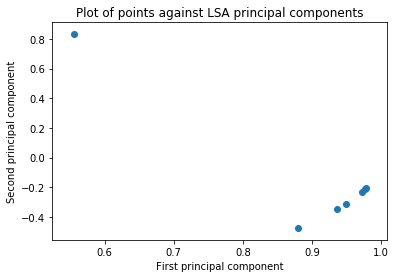

In [16]:
# Plot scatter plot of points
%pylab inline
import matplotlib.pyplot as plt
figure()
plt.scatter(xs,ys)
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
show()

Populating the interactive namespace from numpy and matplotlib


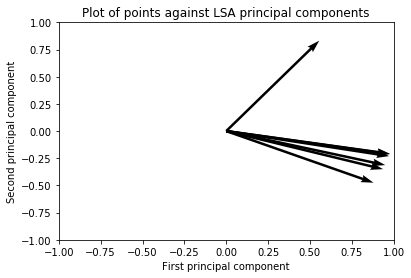

In [17]:
# Plot scatter plot of points with vectors
%pylab inline
import matplotlib.pyplot as plt
plt.figure()
ax = plt.gca()
ax.quiver(0,0,xs,ys,angles='xy',scale_units='xy',scale=1, linewidth = .01)
ax.set_xlim([-1,1])
ax.set_ylim([-1,1])
xlabel('First principal component')
ylabel('Second principal component')
title('Plot of points against LSA principal components')
plt.draw()
plt.show()

In [18]:
#Compute document similarity using LSA components
similarity = np.asarray(numpy.asmatrix(dtm_lsa) * numpy.asmatrix(dtm_lsa).T)
pd.DataFrame(similarity,index=movie_title, columns=movie_title).head(10)

,Alien,Titanic,Blade,GodFather,Total-Recall,War-Horse,Yes-Man
Alien,1.000000,0.984382,0.999200,0.994573,0.996356,0.994218,0.267812
Titanic,0.984382,1.000000,0.990634,0.960723,0.965779,0.959785,0.094013
Blade,0.999200,0.990634,1.000000,0.989618,0.992149,0.989129,0.229076
GodFather,0.994573,0.960723,0.989618,1.000000,0.999823,0.999994,0.366601
Total-Recall,0.996356,0.965779,0.992149,0.999823,1.000000,0.999754,0.349015
War-Horse,0.994218,0.959785,0.989129,0.999994,0.999754,1.000000,0.369725
Yes-Man,0.267812,0.094013,0.229076,0.366601,0.349015,0.369725,1.000000
